In [ ]:
#El ficheros trump_graph.csv contiene un grafo generado a partir de la información de extraída de 108228 tweets
#obtenidos con la búsqueda 'Trump'.
#Fichero de relaciones: trump_graph.csv

In [ ]:
%pip install -U networkx

In [1]:
import networkx as nx

In [2]:
nx.test()

============================= test session starts ==============================
platform darwin -- Python 3.7.7, pytest-5.4.2, py-1.8.1, pluggy-0.13.1
rootdir: /Users/ecrespo/Documents/github/Analisis-RRSS-Python/Proyecto
plugins: arraydiff-0.3, remotedata-0.3.2, hypothesis-5.11.0, openfiles-0.5.0, doctestplus-0.5.0, astropy-header-0.1.2
collected 3649 items / 2 skipped / 3647 selected

algorithms/approximation/tests/test_approx_clust_coeff.py ......         [  0%]
algorithms/approximation/tests/test_clique.py .......                    [  0%]
algorithms/approximation/tests/test_connectivity.py ..................   [  0%]
algorithms/approximation/tests/test_dominating_set.py ...                [  0%]
algorithms/approximation/tests/test_independent_set.py .                 [  0%]
algorithms/approximation/tests/test_kcomponents.py ................      [  1%]
algorithms/approximation/tests/test_matching.py .                        [  1%]
algorithms/approximation/tests/test_ramsey.py .  

True

In [2]:
G_Trump = nx.read_edgelist('./data/trump_graph.csv',create_using=nx.Graph(),nodetype=int)

In [3]:
print(nx.info(G_Trump))

Name: 
Type: Graph
Number of nodes: 52087
Number of edges: 99231
Average degree:   3.8102


In [4]:
#densidad del grafo: el ratio entre las conexiones presentes en el grafo y todas las conexiones posibles.
nx.density(G_Trump)

7.315213611657281e-05

In [5]:
#Diámetro: la ruta más larga entre todas las rutas más cortas de conexión posible entre los nodos dos a dos (máxima distancia entre puntos extremos de la red)
#Transitividad: mide las interconexiones en una red, (responde a la pregunta si A conoce a B y A conoce a C, ¿B y C se conocen?)

#diameter = nx.diameter(G_Trump) #NetworkXError: Found infinite path length because the graph is not connected

triadic_closure = nx.transitivity(G_Trump)
print(triadic_closure)

0.002423242339673429


In [7]:
#ejercicio 1 - Visualizar el grafo
import matplotlib.pyplot as plt
plt.axis('off')
spring_pos = nx.spring_layout(G_Trump)
#colores = [parts[n] for n in G_Trump.nodes()]
nx.draw_networkx(G_Trump, pos=spring_pos, cmap=plt.get_cmap('jet'), node_size=2, with_labels=False)
#Tarda mucho

In [6]:
#ejercicio 2 - Simplificar Red. Limpieza de datos: 
#  - Eliminar nodos con pocas conexiones con el resto

In [9]:
#Calcula el grado de cada nodo (número de conexiones y salientes) (método G.degree)
#The node degree is the number of edges adjacent to the node. The weighted node degree is the sum of the edge weights for edges incident to that node.
#https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
deg_Trump = G_Trump.degree
deg_min_Trump = 15

In [10]:
nodes_Trump = [k[0] for k in deg_Trump if k[1]>=deg_min_Trump]
print(len(nodes_Trump))
G_simple_Trump = G_Trump.subgraph(nodes_Trump)

1459


--- Trump ---


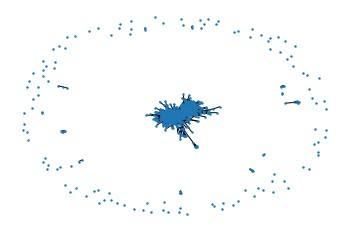

In [12]:
#Visualizar grafo simple Trump
print('--- Trump ---')
import matplotlib.pyplot as plt
plt.axis('off')
spring_pos = nx.spring_layout(G_simple_Trump)
nx.draw_networkx(G_simple_Trump, pos=spring_pos, cmap=plt.get_cmap('jet'), node_size=2, with_labels=False)

In [13]:
#ejercicio3
#  - Eliminar subgrafos que no estén conectados con el grafo más grande.

# La función nx.connected_components recupera las distintas componentes conexas que hay en nuestro grafo.
# El método subgraph del grafo para crear un nuevo grafo únicamente con la mayor componente conexa detectada.

cc_Trump = nx.connected_components(G_simple_Trump)
components_size_Trump = [len(c) for c in sorted(cc_Trump, key=len, reverse=True)]
print(max(components_size_Trump))

largest_cc_Trump = max(nx.connected_components(G_simple_Trump), key=len)
G_final_Trump = G_simple_Trump.subgraph(largest_cc_Trump)

1299


In [14]:
print('\n---- Comparativa Grafos ----')
print('\n---- Trump ----')
print(nx.info(G_Trump))
print(f'Densidad: {nx.density(G_Trump)}')
triadic_closure = nx.transitivity(G_Trump)
print(f'Transitividad: {triadic_closure}')
print('\n---- Trump Simple----')
print(nx.info(G_simple_Trump))
print(f'Densidad: {nx.density(G_simple_Trump)}')
triadic_closure = nx.transitivity(G_simple_Trump)
print(f'Transitividad: {triadic_closure}')
print('\n---- Trump Final----')
print(nx.info(G_final_Trump))
print(f'Densidad: {nx.density(G_final_Trump)}')
diameter = nx.diameter(G_final_Trump)
print(f'diametro: {diameter}') #todos los nodos están conectados y ahora tiene diametro
triadic_closure = nx.transitivity(G_final_Trump)
print(f'Transitividad: {triadic_closure}')


---- Comparativa Grafos ----

---- Trump ----
Name: 
Type: Graph
Number of nodes: 52087
Number of edges: 99231
Average degree:   3.8102
Densidad: 7.315213611657281e-05
Transitividad: 0.002423242339673429

---- Trump Simple----
Name: 
Type: Graph
Number of nodes: 1459
Number of edges: 9111
Average degree:  12.4894
Densidad: 0.008566101704476543
Transitividad: 0.014003085117219902

---- Trump Final----
Name: 
Type: Graph
Number of nodes: 1299
Number of edges: 9045
Average degree:  13.9261
Densidad: 0.010728888287897174
diametro: 9
Transitividad: 0.013519760910636346


---- Trump ----


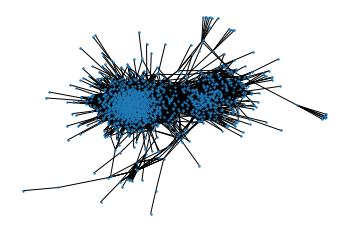

In [15]:
#imprimir los grafos limpios
import matplotlib.pyplot as plt
plt.axis('off')

print('---- Trump ----')
spring_pos = nx.spring_layout(G_final_Trump)
nx.draw_networkx(G_final_Trump, pos=spring_pos, cmap=plt.get_cmap('jet'), node_size=2, with_labels=False)

In [16]:
#Análisis de la red

In [17]:
#Análisis de los nodos
#  - Identificación de los 'intermediadores' de la red.
#  - Identificación de los 'influencers' de la red.

In [18]:
#ejercicio4 - Analizar la centralidad de la red
#  1. Calcula la centralidad de intermediación de la red y visualiza los nodos con mayor valor.
#  2. Calcula la centralidad de Katz (pagerank o la centralidad de valor propio debeíran dar resultados similares)
#     y visualiza la posición de los nodos de mayor valor.

In [19]:
#Centralidad de intermediación - en cada nodo contamos el número de rutas óptimas (i.e. la ruta más corta entre dos nodos cualesquiera) que pasan por él
#Compute the shortest-path betweenness centrality for nodes.
bt_Trump = nx.betweenness_centrality(G_final_Trump)

bt_list_Trump = [(id, b) for id, b in bt_Trump.items()]

bt_list_Trump_ord = sorted(bt_list_Trump, key=lambda b: b[1], reverse=True)

print('\nNodos con mas centralidad de intermediación - Trump')
for node_id, centrality in bt_list_Trump_ord[:10]:
    print(node_id, centrality)


Nodos con mas centralidad de intermediación - Trump
25073877 0.3158140564725842
939091 0.08854426366507193
1917731 0.040582556932208025
21619519 0.02594563589976007
822215679726100480 0.025930835524576562
750299424513990656 0.024043320370602122
4541141723 0.020889899407087614
2980625739 0.020530544369436122
2430341433 0.01861432537129908
29501253 0.018367876696900216


--- Trump ---


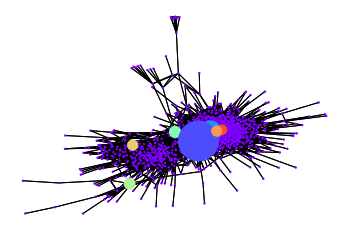

In [22]:
print('--- Trump ---')
top = 10 # dibuja los 10 nodos con mayor centralidad
bt_values = [0]*len(G_final_Trump.nodes())
bt_colors = [0]*len(G_final_Trump.nodes())

z=1
l_nodos = list(G_final_Trump.nodes())
for max_id, max_bt in bt_list_Trump_ord[:top]:
    bt_values[l_nodos.index(max_id)] = 5000*max_bt
    bt_colors[l_nodos.index(max_id)] = z
    z+=1

# Primero dibujamos todos los puntos con un diámetro pequeño
plt.axis("off")
spring_pos_Trump = nx.spring_layout(G_final_Trump)
h = nx.draw_networkx(G_final_Trump, pos = spring_pos_Trump, cmap = plt.get_cmap("rainbow"),node_color = [0]*len(G_final_Trump.nodes()), node_size = [2]*len(G_final_Trump.nodes()), with_labels = False)

# Dibujamos todos los puntos otra vez, pero ahora
# la mayoría tienen diámetro 0 y los 10 con mayor
# centralidad tienen diámetro proporcional a su valor
h = nx.draw_networkx(G_final_Trump, pos = spring_pos_Trump, cmap = plt.get_cmap("rainbow"),node_color = bt_colors, node_size = bt_values, with_labels = False)

In [24]:
# Centralidad de Katz
#ka_Trump = nx.katz_centrality(G_final_Trump) #FALLA
ka_np_Trump = nx.katz_centrality_numpy(G_final_Trump)
ein_Trump = nx.eigenvector_centrality(G_final_Trump)
#ein_np_Trump = nx.eigenvector_centrallity_numpy(G_final_Trump)
pr_Trump = nx.pagerank(G_final_Trump)

In [25]:
ka_list_Trump = [(id, b) for id, b in ka_np_Trump.items()]

ka_list_Trump_ord = sorted(ka_list_Trump, key=lambda b: b[1], reverse=True)

print('\nNodos con mas centralidad de Katz - Trump')
for node_id, centrality in ka_list_Trump_ord[:10]:
    print(node_id, centrality)


Nodos con mas centralidad de Katz - Trump
160010755 0.12945134439966044
501397421 0.1294436270976206
27493883 0.10791440758295821
3223426134 0.10589544282365194
328756439 0.08812464048565143
199159655 0.08682765332911152
1252834189 0.08620508218956636
42672436 0.08436563101824572
471677441 0.07987335434754941
769125871764529152 0.07862231312110073


--- Trump ---


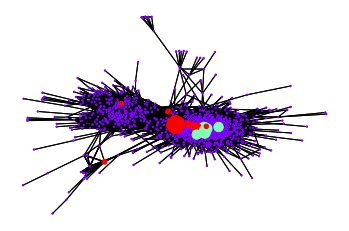

In [26]:
#Visualización
print('--- Trump ---')
top = 10 # dibuja los 10 nodos con mayor centralidad
bt_values = [0]*len(G_final_Trump.nodes())
bt_colors = [0]*len(G_final_Trump.nodes())

l_nodos = list(G_final_Trump.nodes())

for max_id, max_bt in ka_list_Trump_ord[:top]:
    bt_values[l_nodos.index(max_id)] = 1000*max_bt
    bt_colors[l_nodos.index(max_id)] = 1

for max_id, max_bt in bt_list_Trump_ord[:top]:
    bt_values[l_nodos.index(max_id)] = 1000*max_bt
    bt_colors[l_nodos.index(max_id)] = 2

# Primero dibujamos todos los puntos con un diámetro pequeño
plt.axis("off")
spring_pos_Trump = nx.spring_layout(G_final_Trump)
h = nx.draw_networkx(G_final_Trump, pos = spring_pos_Trump, cmap = plt.get_cmap("rainbow"),node_color = [0]*len(G_final_Trump.nodes()), node_size = [2]*len(G_final_Trump.nodes()), with_labels = False)

# Dibujamos todos los puntos otra vez, pero ahora
# la mayoría tienen diámetro 0 y los 10 con mayor
# centralidad tienen diámetro proporcional a su valor
h = nx.draw_networkx(G_final_Trump, pos = spring_pos_Trump, cmap = plt.get_cmap("rainbow"),node_color = bt_colors, node_size = bt_values, with_labels = False)

In [27]:
#ejercicio5 -  Vuelve a conectarte a la API de Twitter y recupera la información de los ids
#  con mayor importancia en la red (puedes fijarte en los 10 o 20 primeros).

In [28]:
import tweepy
from twitter_secrets import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify= True) #así espera y notifica

try:
    api.verify_credentials()
    print("Autentificación OK")
except tweepy.TweepError as e:
    print("Falló la autentificación")
    print(e)

ids_cent_Trump = bt_list_Trump_ord[:30]

ids_cent_ka_Trump = ka_list_Trump_ord[:30]

Autentificación OK


In [29]:
print('Usuarios con más importancia en la red (centralidad de intermediación) para Trump:')
for i, c in ids_cent_Trump:
    try:
        user = api.get_user(i)
        print(f' - {user.name} - {user.screen_name} - Followers: {user.followers_count} - tweets: {user.statuses_count} - lang: {user.lang}')
    except tweepy.TweepError as e:
        #print(e)
        #print(f'------ El usuario {i} no existe')
        continue

Usuarios con más importancia en la red (centralidad de intermediación) para Trump:
 - Donald J. Trump - realDonaldTrump - Followers: 81960781 - tweets: 52704 - lang: None
 - Joe Biden - JoeBiden - Followers: 6103931 - tweets: 4908 - lang: None
 - The Hill - thehill - Followers: 3805704 - tweets: 739219 - lang: None
 - Joe Scarborough - JoeNBC - Followers: 2678835 - tweets: 50048 - lang: None
 - President Trump - POTUS - Followers: 30502813 - tweets: 9834 - lang: None
 - Paprika Lady - PaprikaLady - Followers: 974 - tweets: 30733 - lang: None
 - WenMaMa2 🤔🧐🕵️‍♀️ - WenMaMa2 - Followers: 24202 - tweets: 100835 - lang: None
 - Trump’s Enemy Number One - trump_enemy - Followers: 3879 - tweets: 622323 - lang: None
 - Henry galvin - henrygalvin88 - Followers: 1957 - tweets: 382610 - lang: None
 - Adam Schiff - RepAdamSchiff - Followers: 2299005 - tweets: 5746 - lang: None
 - MSNBC - MSNBC - Followers: 3420602 - tweets: 208578 - lang: None
 - Beverly#Resistance🌊 - BeverlyFolkers - Followers: 1

In [30]:
print('Usuarios con más importancia en la red (centralidad de Katz - autoridad) para Trump:')
for i, c in ids_cent_ka_Trump:
    try:
        user = api.get_user(i)
        print(f' - {user.name} - {user.screen_name} - Followers: {user.followers_count} - tweets: {user.statuses_count} - lang: {user.lang}')
    except tweepy.TweepError as e:
        #print(e)
        #print(f'------ El usuario {i} no existe')
        continue

Usuarios con más importancia en la red (centralidad de Katz - autoridad) para Trump:
 - John Dean - JohnWDean - Followers: 259297 - tweets: 13363 - lang: None
 - Beverly#Resistance🌊 - BeverlyFolkers - Followers: 13912 - tweets: 333379 - lang: None
 - Jon Cooper 🇺🇸 - joncoopertweets - Followers: 478591 - tweets: 184655 - lang: None
 - Seth Abramson (@🏠) - SethAbramson - Followers: 810833 - tweets: 77625 - lang: None
 - Southern Sister Resister - ResisterSis20 - Followers: 54987 - tweets: 148402 - lang: None
 - Can you fight a tweet? 🌊 🌊 🌊 - shellzortizz - Followers: 8518 - tweets: 15481 - lang: None
 - Ronnee Audas🌊🌊🌊✊✊✊ - ronnee123 - Followers: 2127 - tweets: 112297 - lang: None
 - Flinks - sharonflink - Followers: 940 - tweets: 121058 - lang: None
 - George Conway - gtconway3d - Followers: 1183003 - tweets: 54095 - lang: None
 - Karen (Lee) Calcaterra - advoteen2264 - Followers: 541 - tweets: 39278 - lang: None
 - Amazing Amy Harlib - amyharlib - Followers: 2108 - tweets: 290253 - lan

In [31]:
#ejercicio6 - Detección de comunidades. Analiza las comunidades que aparecen en el grafo
#  - Identificación de comunidades.
#  - Visualizar comunidades

In [32]:
#comunidades
import community
parts_Trump = community.best_partition(G_final_Trump)
    
communities_Trump = set(parts_Trump.values())
print('\n--- Comunidades Trump ---')
print(communities_Trump)

members_Trump = {c:[] for c in communities_Trump}
for id, c in parts_Trump.items():
    members_Trump[c].append(id)

for c, m in members_Trump.items():
    print(f'Comunidad {c}: {len(m)} elementos')


--- Comunidades Trump ---
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
Comunidad 0: 264 elementos
Comunidad 1: 81 elementos
Comunidad 2: 143 elementos
Comunidad 3: 340 elementos
Comunidad 4: 170 elementos
Comunidad 5: 62 elementos
Comunidad 6: 139 elementos
Comunidad 7: 44 elementos
Comunidad 8: 23 elementos
Comunidad 9: 2 elementos
Comunidad 10: 7 elementos
Comunidad 11: 24 elementos


In [33]:
#comunidades más importantes top10
print('Top10 comunidades Trump')
top_comunidades_Trump = [(c,len(m)) for c, m in members_Trump.items()]
top_comunidades_Trump_ord = sorted(top_comunidades_Trump, key=lambda b: b[1], reverse=True)
print(top_comunidades_Trump_ord[:10])

Top10 comunidades Trump
[(3, 340), (0, 264), (4, 170), (2, 143), (6, 139), (1, 81), (5, 62), (7, 44), (11, 24), (8, 23)]


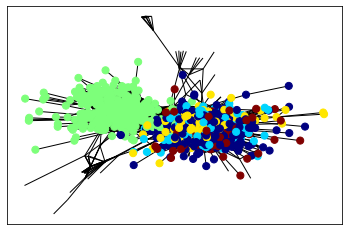

In [34]:
#Representacion gráfica Trump
#lista de colores para cada nodo
colores = [parts_Trump[n] for n in G_final_Trump.nodes()]
colores_modificado = [c if len(members_Trump[c]) > 100 else 0 for c in colores]
sizes = [50 if len(members_Trump[c]) > 50 else 0 for c in colores]

nx.draw_networkx(G_final_Trump, pos=spring_pos_Trump, cmap=plt.get_cmap('jet'), node_color=colores_modificado, node_size=sizes, with_labels=False)


In [35]:
#ejercicio7 - Análisis
#  1. Recupera la lista de los usuarios con más importancia en cada comunidad 
#     (primero necesitas la lista de usuarios de cada comunidad, y luego ordenarla por su importancia).
#  2. Conéctate a la API de Twitter e identifica los usuarios que aparecen.
#     ¿Se pueden identificar las comunidades que se han generado?
#  3. ¿Qué criterio de centralidad utilizarás para identificar los usuarios más representativos?
#     ¿Qué usuarios aparecen con los mayores valores de centralidad de intermediación?

In [36]:
#solo analizo el top10 de las comunidades
